___
# _<font color = E50FB4>Climate Analysis and Exploration<font>_
___

In [58]:
# Dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('dark_background')

#style.use('fivethirtyeight')

# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy import create_engine, func,inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

___
### _<font color = darkblue>Method-1: Retrieve the tables using <font color = E50FB4>'Pandas read_sql'_
___

In [59]:
# Create an engine and connection to the database

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

connection = engine.connect()

In [60]:
# Print all table names in database

print(engine.table_names())

['measurement', 'station']


In [61]:
# Retrieve the data from 'measurement' table

Measurement_df = pd.read_sql('select * from measurement', connection)

Measurement_df.set_index('id',drop = True)

Measurement_df.head(10).style.set_properties(**{'background-color': 'black','color': 'cyan',})

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65
1,2,USC00519397,2010-01-02,0,63
2,3,USC00519397,2010-01-03,0,74
3,4,USC00519397,2010-01-04,0,76
4,5,USC00519397,2010-01-06,nan,73
5,6,USC00519397,2010-01-07,0.06,70
6,7,USC00519397,2010-01-08,0,64
7,8,USC00519397,2010-01-09,0,68
8,9,USC00519397,2010-01-10,0,73
9,10,USC00519397,2010-01-11,0.01,64


In [62]:
# Retrieve the data from 'station' table

Station_df = pd.read_sql('select * from station', connection)

Station_df.set_index('id',drop = True)

Station_df.style.set_properties(**{'background-color': 'black','color': 'cyan'})

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.817,3
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.802,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.837,7
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.975,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.011,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.3356,-157.711,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.4517,-157.849,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.3152,-157.999,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.803,152.4


___
### _<font color = darkblue>Method-2: Retrieve the Tables using <font color = E50FB4>'Inspect'<font>_
___

In [63]:
# Use the Inspector to explore the database and print the table names

inspector = inspect(engine)

inspector.get_table_names()

['measurement', 'station']

In [64]:
# Use Inspector to print the names and types of columns in 'measurement' table

measurement_columns = inspector.get_columns('measurement')

print(f"The columns in 'measurement' table are:\n")
for mc in measurement_columns:
    print(mc['name'], mc['type'])

# Use Inspector to print the names and types of columns in 'station' table

station_columns = inspector.get_columns('station')

print(f"\nThe columns in 'station' table are:\n")
for sc in station_columns:
    print(sc['name'], sc["type"])

The columns in 'measurement' table are:

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

The columns in 'station' table are:

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [65]:
# Print the data in 'measurement' table

measurement = engine.execute('select * from measurement').fetchall()

measurement

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [66]:
# Print the data in 'station' table

station = engine.execute('select * from Station').fetchall()

station

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [67]:
print(f"\nType of 'engine.execute' results: \n{type(station[0])}\n{type(measurement)}")


Type of 'engine.execute' results: 
<class 'sqlalchemy.engine.result.RowProxy'>
<class 'list'>


___
### _<font color = darkblue>Method-3:  Reflect the Tables into <font color = E50FB4>SQLAlchemy ORM_
___

In [68]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect an existing database into a new model

Base = automap_base()

# Reflect the tables

Base.prepare(engine, reflect=True)

In [69]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [70]:
# Save references to measurement table

Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [71]:
# Save references to station table

Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [72]:
# Create a session (link) from Python to the DB

session = Session(engine)

In [73]:
# Display the first row values of 'measurement' table in dictionary format

Measurement_firstrow = session.query(Measurement).first()
Measurement_firstrow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11d256510>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [74]:
# Display the first row values of 'station' table in dictionary format

Station_firstrow = session.query(Station).first()
Station_firstrow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11d25d350>,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [75]:
print(f"\n'engine.execute' results Type : \n{type(station[0])}\n{type(measurement)}")


'engine.execute' results Type : 
<class 'sqlalchemy.engine.result.RowProxy'>
<class 'list'>


___
# _<font color = E50FB4>Precipitation Analysis</font>_
___


### _<font color = darkblue>Design a query to find the date of latest data point<font>_
___

In [76]:
# Import datetime and timedelta

from datetime import datetime,timedelta

# Design a query to find the date of last data point

date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The date_query result is {date_query}       --->Type {type(date_query)}')


# Calculate the date of last data point from the query

latest_date_str = date_query[0]
print(f'\nThe latest date in string format is {latest_date_str} --->Type {type(latest_date_str)}')


# Using strptime() to create a datetime object from the time string

latest_date = datetime.strptime(latest_date_str,"%Y-%m-%d").date()
print(f'\nThe latest date in date format is {latest_date}   --->Type {type(latest_date)}')


# Calculate the date 1 year ago from the last data point in the database

Year_Ago_Date = latest_date - timedelta(days=365)
print(f'\nThe Year ago date is {Year_Ago_Date}                --->Type {type(Year_Ago_Date)}')


The date_query result is ('2017-08-23',)       --->Type <class 'sqlalchemy.util._collections.result'>

The latest date in string format is 2017-08-23 --->Type <class 'str'>

The latest date in date format is 2017-08-23   --->Type <class 'datetime.date'>

The Year ago date is 2016-08-23                --->Type <class 'datetime.date'>


___
### _<font color = darkblue>Design a query to retrieve precipitation data for last 12 months_
___

In [77]:
# Perform a query to retrieve the date and precipitation scores

prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Year_Ago_Date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_query, columns =['Date','Precipitation'])


# Set the 'Date' column as index

prcp_df = prcp_df.set_index('Date')

# Sort the dataframe by date

prcp_df = prcp_df.sort_index()

prcp_df.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


___
### _<font color = darkblue>Plot the precipitation data<font>_
___

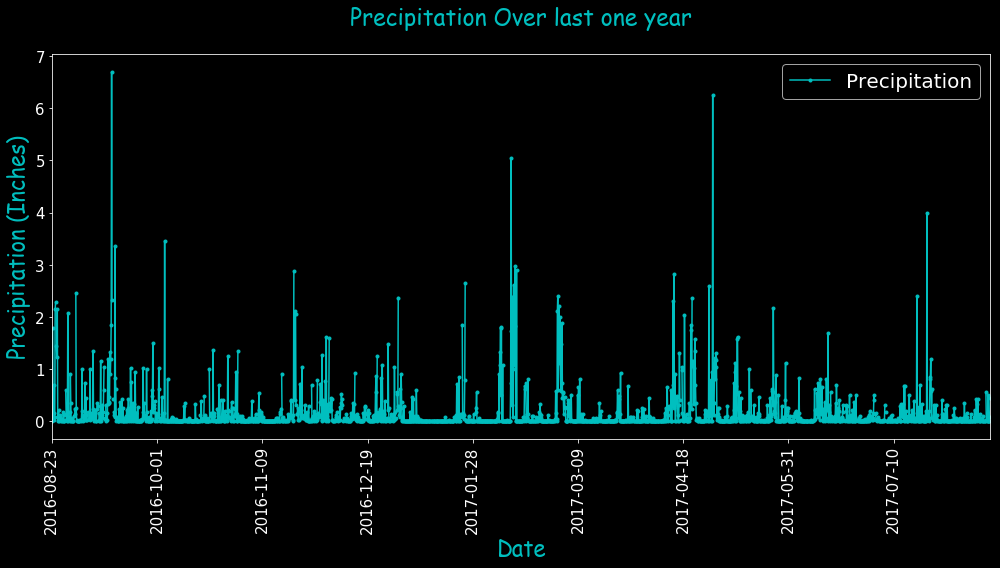

In [79]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(kind = "line",
             figsize = (14,8),
             marker = '.',
             color = 'c',
             fontsize = 15,
             rot = 'vertical')

# Incorporate other graph properties

plt.title("Precipitation Over last one year", color = 'c', fontname='Comic Sans MS', fontsize = 23, pad = 30)

plt.ylabel("Precipitation (Inches)", color = 'c', fontname='Comic Sans MS', fontsize = 22)

plt.xlabel("Date", color = 'c', fontname='Comic Sans MS', fontsize = 22)

plt.legend(prop={'size': 20})

plt.tight_layout()

plt.show()

___
### _<font color = darkblue>Summary statistics for the precipitation data<font>_
___


In [80]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe().style.set_properties(**{'background-color': 'black','color': 'cyan'})

,Precipitation
count,2021
mean,0.177279
std,0.46119
min,0
25%,0
50%,0.02
75%,0.13
max,6.7


___
# _<font color = E50FB4>Station Analysis<font>_
___

### _<font color = darkblue>Design a query to calculate the total number of stations<font>_
___

In [81]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(func.count(Station.station)).all()

print(f'There are {station_count[0][0]} stations in this dataset.\n')

# Design a query to list the stations names

station_names = session.query(Station.name).all()

print(f'The station names are:\n')

for row in station_names:
    print(row[0])

There are 9 stations in this dataset.

The station names are:

WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


___
### _<font color = darkblue>Design a query to find the most active station (Station with most observations)<font>_
___

In [82]:
# Design a query to find the stations and observation counts in descending order.

station_query_desc = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
                     filter(Measurement.station == Station.station).\
                     group_by(Measurement.station).\
                     order_by(func.count().desc()).\
                     all()

# List all the stations and the counts in descending order

station_query_desc_df = pd.DataFrame(station_query_desc, columns = ["Station_ID","Station_name","tobs_count"])

station_query_desc_df.style.set_properties(**{'background-color': 'black','color': 'cyan',})

,Station_ID,Station_name,tobs_count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [83]:
# Print the station with highest number of observations

most_active_station_id = station_query_desc[0][0]
most_active_station_name = station_query_desc[0][1]

print(f'\nThe station with highest number of observations is {most_active_station_name}\n')

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station

stats_query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
              filter(Measurement.station == most_active_station_id).all()

print(f'The lowest temperature recorded: {stats_query[0][0]}')
print(f'The highest temperature recorded: {stats_query[0][1]}')
print(f'The average temperature recorded: {round(stats_query[0][2],2)}')


The station with highest number of observations is WAIHEE 837.5, HI US

The lowest temperature recorded: 54.0
The highest temperature recorded: 85.0
The average temperature recorded: 71.66


___
### _<font color = darkblue>Design a query to retrieve temperature observation data(TOBS) for the last 12 months<font>_
___

In [84]:
# Query the last 12 months of TOBS for the most active station

tobs_query = session.query(Measurement.date, Measurement.tobs).\
             filter(Measurement.station == most_active_station_id).\
             filter(Measurement.date >= Year_Ago_Date).\
             all()         

# Save the query results as a Pandas DataFrame

tobs_df = pd.DataFrame(tobs_query, columns =['Date','Temperature'])


# Set the 'Date' column as index & Sort the dataframe by date

tobs_df = tobs_df.set_index('Date').sort_index()

tobs_df.head(15).style.set_properties(**{'background-color': 'black','color': 'cyan',})


,Temperature
Date,
2016-08-23,77
2016-08-24,77
2016-08-25,80
2016-08-26,80
2016-08-27,75
2016-08-28,73
2016-08-29,78
2016-08-30,77
2016-08-31,78


___
### _<font color = darkblue>Plot the results as a histogram with bins=12<font>_
___

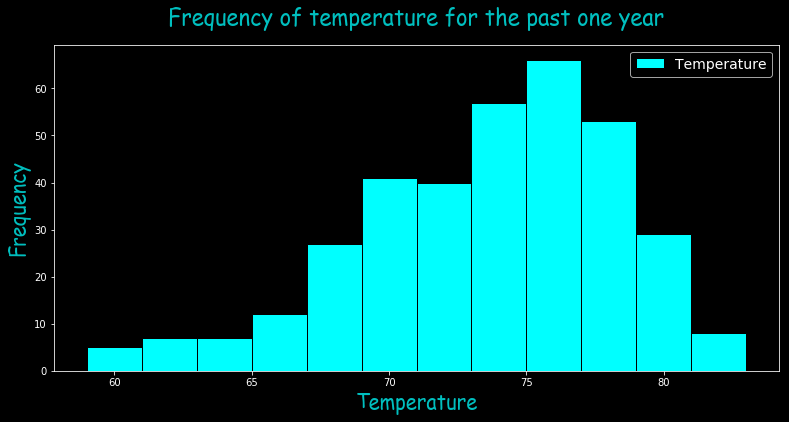

In [87]:
tobs_df.plot(kind='hist',
             bins = 12,
             figsize = (13,6),
             color='cyan',
             edgecolor = 'k'
            )

# Incorporate other graph properties

plt.title("Frequency of temperature for the past one year",
          fontname='Comic Sans MS',
          fontsize = 22,
          color = 'c',
          pad = 20
         )

plt.ylabel("Frequency",color = 'c', fontname='Comic Sans MS', fontsize = 20)

plt.xlabel("Temperature", color = 'c',fontname='Comic Sans MS', fontsize = 20)

plt.legend(prop={'size': 14})

plt.show()

___
# _<font color = E50FB4>Bonus Challenge Assignment_
___

In [90]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    stats_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

    return stats_query

# function usage example

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [121]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = '2016-12-25'
end_date = '2017-01-01'

prev_year_start = datetime.strptime(start_date,"%Y-%m-%d").date() - timedelta(days=365)

prev_year_end = datetime.strptime(end_date,"%Y-%m-%d").date() - timedelta(days=365)

print(f'Temp stats for dates between {prev_year_start} & {prev_year_end}:\n')

Min_temp, Avg_temp, Max_temp = calc_temps(prev_year_start, prev_year_end)[0]

print(f'Min Temperature: {Min_temp} \nAvg Temperature: {round(Avg_temp,1)} \nMax Temperature: {Max_temp}')

Temp stats for dates between 2015-12-26 & 2016-01-02:

Min Temperature: 62.0 
Avg Temperature: 71.8 
Max Temperature: 77.0


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize = (2,6))

plt.bar(1,Avg_temp,yerr = Max_temp - Min_temp,width = 0.1,color = 'coral', ecolor = "white")

plt.xticks([])
plt.title("Trip Avg Temp", fontname='Comic Sans MS', fontsize = 16)
plt.ylabel("Temp(F)", fontname='Comic Sans MS', fontsize = 15)
plt.show()

In [135]:
# Calculate the total amount of rainfall per weather station for your trip dates 
# using the previous year's matching dates.
# Sort this in descending order by precipitation amount 
# and list the station, name, latitude, longitude, and elevation

sel = [Station.station, 
       Station.name, 
       Station.latitude,
       Station.longitude,
       Station.elevation,
       func.sum(Measurement.prcp)
      ]


rainfall_query = session.query(*sel).\
                 filter(Measurement.station >= prev_year_start).\
                 filter(Measurement.date <= prev_year_end).\
                 group_by(Station.name).\
                 order_by(func.sum(Measurement.prcp).desc()).\
                 all()

for row in rainfall_query:
    print(row)


('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2326.1899999999614)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 2326.1899999999614)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2326.1899999999614)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 2326.1899999999614)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2326.1899999999614)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 2326.1899999999614)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 2326.1899999999614)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2326.1899999999614)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 2326.1899999999614)


In [113]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# function usage example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [185]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start_date = '2017-12-25'
trip_end_date = '2017-12-31'

# Use the start and end date to create a range of dates

date_range = pd.date_range(trip_start_date, trip_end_date, freq = 'D')

print(f'\nDates:\n\n{date_range}')

# Strip off the year and save a list of %m-%d strings

month_day = date_range.strftime("%m-%d")

print(f'\nMonth-Day List: \n\n{month_day}')


# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []

for row in month_day:
    normals.append(*daily_normals(row))
   
print(f'\nDaily Normals:\n\n{normals}')


Dates:

DatetimeIndex(['2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='D')

Month-Day List: 

Index(['12-25', '12-26', '12-27', '12-28', '12-29', '12-30', '12-31'], dtype='object')

Daily Normals:

[(60.0, 71.75, 79.0), (63.0, 71.44680851063829, 77.0), (62.0, 71.91666666666667, 79.0), (62.0, 70.52083333333333, 77.0), (57.0, 70.29166666666667, 78.0), (63.0, 69.86363636363636, 76.0), (56.0, 68.27906976744185, 77.0)]


In [182]:
# Load the previous query results into a Pandas DataFrame

df = pd.DataFrame(normals, columns=["Min Temp","Avg Temp","Max Temp"])

# Add the `trip_dates` range as the `date` index

df['Date'] = date_range

df = df.set_index("Date")

df

,Min Temp,Avg Temp,Max Temp
Date,,,
2017-12-25,60.0,71.750000,79.0
2017-12-26,63.0,71.446809,77.0
2017-12-27,62.0,71.916667,79.0
2017-12-28,62.0,70.520833,77.0
2017-12-29,57.0,70.291667,78.0
2017-12-30,63.0,69.863636,76.0
2017-12-31,56.0,68.279070,77.0


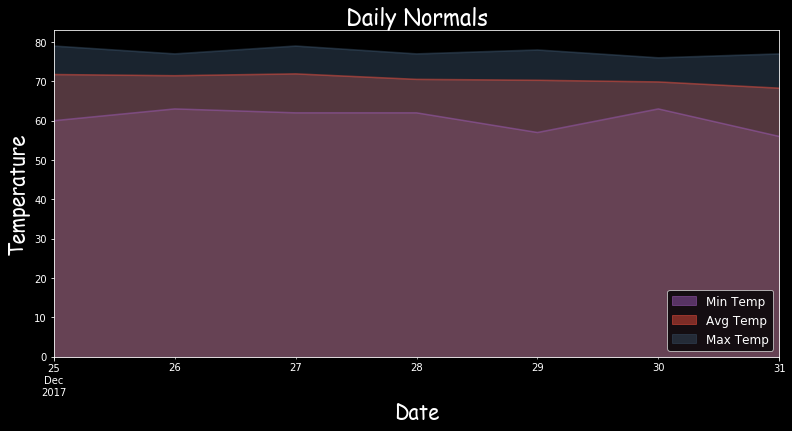

In [195]:
# Plot the daily normals as an area plot with `stacked=False`

#import seaborn as sns
#pal = sns.color_palette("Set1")

pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]

df.plot.area(figsize = (13,6), stacked = False, color = pal) 

plt.title("Daily Normals",color = 'white', fontname='Comic Sans MS', fontsize = 22)

plt.ylabel("Temperature",color = 'white', fontname='Comic Sans MS', fontsize = 20)

plt.xlabel("Date", color = 'white',fontname='Comic Sans MS', fontsize = 20)


plt.legend(prop={'size': 12},loc = 'lower right',facecolor = 'k')

plt.show()